                            Setembro Amarelo: análise do suicídio no Brasil com Data Science


Todos os anos, mais de 12 mil pessoas tiram suas próprias vidas no Brasil. Em um cenário mundial, esse número ultrapassa 1 milhão de pessoas, levando o suicídio a ser considerado um problema de saúde pública.

Setembro Amarelo é uma iniciativa da Associação Brasileira de Psiquiatria (ABP), em parceria com o Conselho Federal de Medicina (CFM), para divulgar e alertar a população sobre o problema.

Oficialmente, o Dia Mundial de Prevenção ao Suicídio ocorre no dia 10 de setembro, porém durante o mês inteiro são promovidos debates, campanhas e ações para a conscientização sobre o suicídio.

O que trazemos ao analisar estes tipos de dados é muito mais que apenas um trabalho de Ciência de Dados. É uma pequena contribuição que visa ajudar a entender a extensão desse problema no Brasil, além de incentivar o Setembro Amarelo.

link do dataset: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

### Dicionário de Variáveis

Esse arquivo csv possui 12 colunas. São elas:

country: país onde os dados foram registrados 101 países

year: ano em que os dados foram registrados 1987 a 2016

sex: sexo considerado no registro male - masculino, female - feminino

age: faixa etária considerada
5-14 anos
15-24 anos
25-34 anos
35-54 anos
55-74 anos
75+ anos

suicides_no: número de suicídios

population: população para o grupo

suicides/100k pop: número de suicídios por 100 mil habitantes

country_year: identificador contendo country + year

HDI for year: Índice de Desenvolvimento Humano (IDH) para o ano

gdp_for_year: Produto Interno Bruto (PIB) para o ano

gdp_per_capita: Produto Interno Bruto (PIB) per capita

Dicionário de Variáveis
Esse arquivo csv possui 12 colunas. São elas:

country: país onde os dados foram registrados
101 países
year: ano em que os dados foram registrados
1987 a 2016
sex: sexo considerado no registro
male - masculino
female - feminino
age: faixa etária considerada
5-14 anos
15-24 anos
25-34 anos
35-54 anos
55-74 anos
75+ anos
suicides_no: número de suicídios
population: população para o grupo
suicides/100k pop: número de suicídios por 100 mil habitantes
country_year: identificador contendo country + year
HDI for year: Índice de Desenvolvimento Humano (IDH) para o ano
gdp_for_year: Produto Interno Bruto (PIB) para o ano
gdp_per_capita: Produto Interno Bruto (PIB) per capita

In [20]:
# importar pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('master.csv')

In [22]:
# ver o formato do DataFrame
print("Formato do DataFrame: ", df.shape)

# ver as 5 primeiras entradas dos dataset
df.head()

Formato do DataFrame:  (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [23]:
# extrair apenas os dados relativos ao Brasil
df_brasil = df[df.country == "Brasil"].copy()

# ver o formato do novo DataFrame
print("Formato do DataFrame: ", df_brasil.shape)

# exibir as 5 primeiras entradas do novo DataFrame
df_brasil.head()

Formato do DataFrame:  (372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
16564,Mexico,1985,male,75+ years,44,432000,10.19,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation
16565,Mexico,1985,male,55-74 years,145,2330000,6.22,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation
16566,Mexico,1985,male,25-34 years,340,5679000,5.99,Mexico1985,0.634,"184,472,557,415",2730,Boomers
16567,Mexico,1985,male,35-54 years,327,5836000,5.60,Mexico1985,0.634,"184,472,557,415",2730,Silent
16568,Mexico,1985,male,15-24 years,375,8420000,4.45,Mexico1985,0.634,"184,472,557,415",2730,Generation X


In [24]:
# valores ausentes nos dados mundiais
print("--> Mundial:")
display(df.isnull().sum())

print("\n", "--." * 10, "\n")

# velores ausentes nos dados do Brasil
print("--> Brasil:")
display(df_brasil.isnull().sum())

--> Mundial:


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


 --.--.--.--.--.--.--.--.--.--. 

--> Brasil:


country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

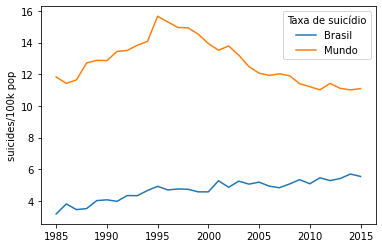

In [25]:
# pegar a media mundial e do Brasil em suicidios
years = df_brasil.year.unique()    # pegar os anos para o eixo x
suicides_brasil_mean = df_brasil.groupby('year')['suicides/100k pop'].mean()
suicides_world_mean = df.groupby('year')['suicides/100k pop'].mean()

# como o Brasil nao tem 2016, vou eliminar do dataframe mundial essa entrada
suicides_world_mean.drop(2016, inplace=True)

# plotar lineplot comparativo entre Brasil e Mundo
ax = sns.lineplot(x=years, y=suicides_brasil_mean, label='Brasil')
ax = sns.lineplot(x=years, y=suicides_world_mean, label='Mundo')
plt.legend(title="Taxa de suicídio")
plt.show()

Uma coisa que é facilmente percebida no gráfico acima é que apesar da taxa de suicídios no Brasil ser menor que a média mundial, ela vem crescendo constantemente ao longo de 30 anos.

A linha laranja teve um pico por volta de 1995, porém reverteu o slope e vem caindo ano após ano. Já a linha azul (Brasil) tem um slope positivo praticamente ao longo de todo o período analisad

In [26]:
# criar uma tabela dinâmica
table = pd.pivot_table(df_brasil, values='suicides_no', index=['year'], columns=['age'])

# reordenar as tableas para deixar em ordem crescente
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table = table.reindex(column_order, axis=1)

# ver as 5 primeiras entradas da pivot table
table.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,34.0,241.0,200.5,191.0,80.0,25.5
1986,28.5,262.5,229.0,206.0,94.0,37.0
1987,26.0,259.0,223.0,223.0,90.5,29.0
1988,30.5,268.0,210.0,206.5,103.0,33.5
1989,27.0,284.0,216.5,241.5,119.5,44.0


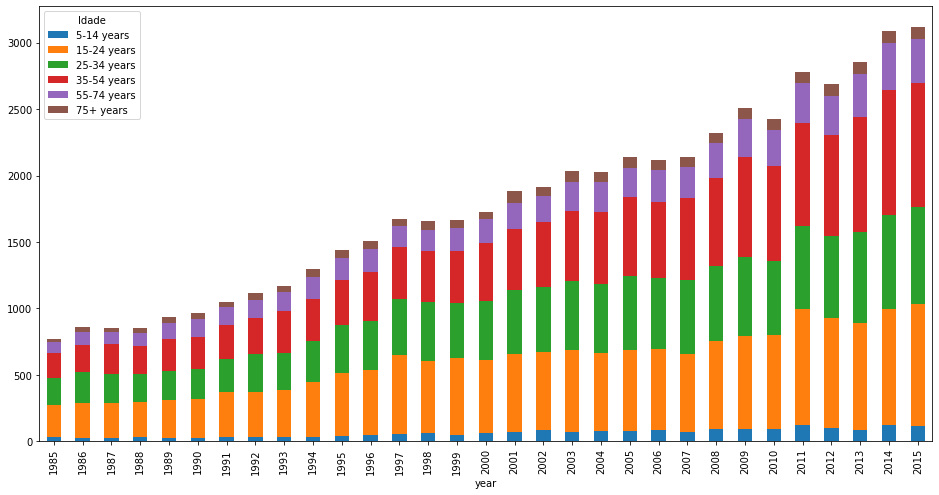

In [27]:
# plotar a pivot table das faixas etárias
table.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title="Idade")

Mesmo visualmente é fácil identificar que o grupo de pessoas que mais cometem suicídio está entre 35-54 anos. Em segundo lugar, estão pessoas entre 25-34 anos de idade.

In [28]:
# estatística de suicídios por faixa etária
table[['25-34 years']].loc[2015]
table.loc[2015] / table.loc[2015].sum()

age
5-14 years     0.037215
15-24 years    0.293712
25-34 years    0.234520
35-54 years    0.298845
55-74 years    0.107796
75+ years      0.027911
Name: 2015, dtype: float64

([<matplotlib.patches.Wedge at 0x280c80785c8>,
 [Text(0.9397728196345092, 0.571687893414059, 'mulheres'),
  Text(-0.9397728463971501, -0.5716878494201173, 'homens')],
 [Text(0.5126033561642777, 0.3118297600440321, '17.40%'),
  Text(-0.5126033707620818, -0.3118297360473367, '82.60%')])

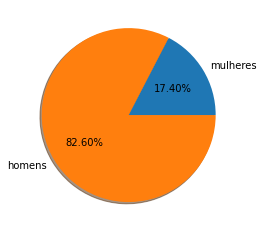

In [31]:
# extrair valores entre homens e mulheres
homens_mulheres = df_brasil.groupby('sex').suicides_no.sum() / df_brasil.groupby('sex').suicides_no.sum().sum()

# plotar o gráfico de pizza
plt.pie(homens_mulheres, labels=['mulheres', 'homens'], autopct='%1.2f%%', shadow=True)

<AxesSubplot:>

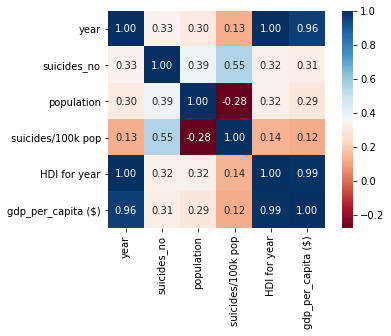

In [30]:
# plotar heatmap
corr = df_brasil.corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)